Import pyspark library, set up SparkContext and SQLContext.

In [99]:
import pyspark
import random

In [100]:
import pandas as pd

In [101]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
import seaborn as sns

Fill in the missing values in the Sepallength column with the column's mean.

In [103]:
df = pd.read_csv("iris_missing.csv")

Mean

In [104]:
sepalength = df['Sepallength']

In [105]:
sepalength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepallength, Length: 150, dtype: float64

In [106]:
sepalength.mean()

5.82

In [107]:
mean_ = sepalength.mean()

Sepalength is null

In [108]:
sepalength[sepalength.isnull()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Sepalength is nan

In [109]:
sepalength[sepalength.isna()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Fill mean

In [110]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

In [111]:
sepalength.fillna(mean_, inplace=True)

3.1. First, calculate the mean of the Sepallength column.

In [112]:
mean_ = sepalength.mean()

In [113]:
mean_

5.820000000000001

3.2. Now, impute the missing values in the Sepallength column with the column's mean.

In [114]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

4. Compute the correlation matrix for the dataset. Make sure to import the required modules, as shown here:

In [115]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


Now, fill the missing values in the DataFrame before computing the correlation:

In [116]:
df[sepalength.isnull()].fillna(mean_, inplace=True)

/tmp/ipykernel_8135/3031420940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sepalength.isnull()].fillna(mean_, inplace=True)


In [117]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


Next, remove the String columns ('Species') from the PySpark DataFrame.

In [118]:
df.drop(columns=['Species'], inplace = True)

7. Compute the correlation matrix in Spark

In [119]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


9. Plot the variable pairs showing strong positive correlation (more than 0.7) and fit a linear line on them.

In [120]:
df.corr()[df.corr() > 0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


In [121]:
corr_matrix= df.corr()[df.corr() > 0.7]

In [122]:
corr_matrix

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


#### Fit line Sepallength , Petallength

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepallength', ylabel='Petallength'>

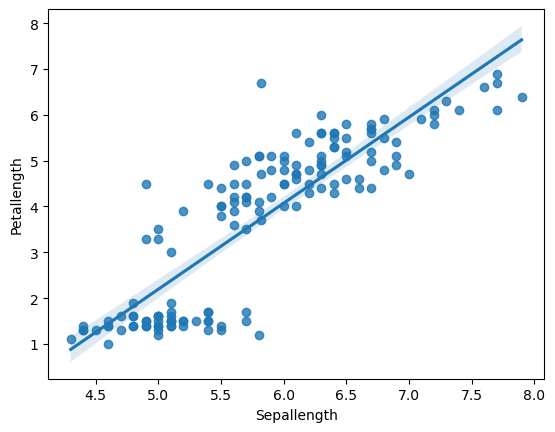

In [123]:
sns.regplot(df.Sepallength,df.Petallength)

In [124]:
corr_matrix_without_zero = corr_matrix.fillna(0)

In [125]:
corr_matrix_without_zero

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.861661,0.810511
Sepalwidth,0.000000,1.0,0.000000,0.000000
Petallength,0.861661,0.0,1.000000,0.962530
Petalwidth,0.810511,0.0,0.962530,1.000000


In [126]:
corr_matrix_without_zero[corr_matrix_without_zero >0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


In [127]:
corr_matrix_without_zero.drop(index='Sepalwidth')

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.861661,0.810511
Petallength,0.861661,0.0,1.000000,0.962530
Petalwidth,0.810511,0.0,0.962530,1.000000


In [128]:
corr_matrix_new = corr_matrix_without_zero.drop(index='Sepalwidth')

In [129]:
corr_matrix_new

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.861661,0.810511
Petallength,0.861661,0.0,1.000000,0.962530
Petalwidth,0.810511,0.0,0.962530,1.000000


In [133]:
corr_matrix_new.drop(columns=['Sepalwidth'])

,Sepallength,Petallength,Petalwidth
Sepallength,1.000000,0.861661,0.810511
Petallength,0.861661,1.000000,0.962530
Petalwidth,0.810511,0.962530,1.000000


Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth'], dtype='object')


/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


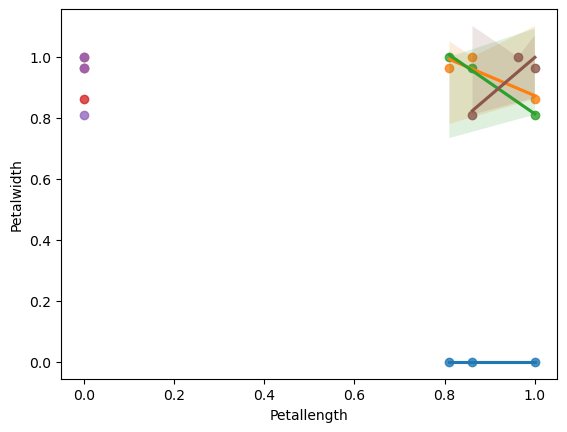

In [151]:
columns_ = corr_matrix_new.columns
print(columns_)
for i in range(len(columns_)):
    for j in range(i+1, len(columns_)):
        sns.regplot(corr_matrix_new[columns_[i]],corr_matrix_new[columns_[j]])
  
       
        
    
    